In [3]:
%%bash
which python
python --version

/home/parvej/anaconda3/envs/mmdet_human/bin/python
Python 3.7.12


In [2]:
# %%bash

# # make sure the conda path is clear so it does not conflict with conda
# export PYTHONPATH=""

# # download and install miniconda
# conda_version='Miniconda3-py37_4.9.2-Linux-x86_64.sh'
# wget https://repo.anaconda.com/miniconda/${conda_version}
# chmod +x ${conda_version}
# ./${conda_version} -b -f -p /usr/local

# # update miniconda
# conda install --channel defaults conda python=3.7 --yes
# conda update --channel defaults --all --yes

Process is terminated.


In [28]:
%%bash
which python
python --version

/home/parvej/anaconda3/envs/mmdet_human/bin/python
Python 3.7.12


In [32]:
conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
!nvidia-smi


Wed Aug 30 15:27:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.199.02   Driver Version: 470.199.02   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 34%   40C    P8    19W / 160W |    708MiB /  5931MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch
print(torch.__version__)

1.7.1.post2


In [4]:
# %%bash

# # install dependencies to clip
# conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
# pip install ftfy regex tqdm wget

# # install clip
# pip install git+https://github.com/openai/CLIP.git

In [30]:
import sys

# make sure the conda libraries are recognized here
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [5]:
import torch
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# load model and image preprocessing
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

cpu


<PIL.Image.Image image mode=RGB size=103x240 at 0x7F723BDC4C90>
Image to be processed


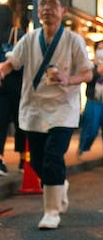



Tensor shape:
torch.Size([1, 3, 224, 224])


In [6]:
from PIL import Image
import requests
import numpy as np

# Set up the image URL
image_name = "pexels-photo-1485637.jpeg"
# image_url = f"https://images.pexels.com/photos/1485637/{image_name}?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"
# image_url = f"https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcR9sAM5zauPVia6qSeuAKu0Oc6EvOurqTt6nYiZzXnWgaU0aeUOxjp5gh_gVgyVUWgpbdKVmfdzYirNAH8"

image_url = f"temp/temp/3__temp.jpg"
image = Image.open( image_url )
numpy_array = np.array(image)
img = Image.fromarray(numpy_array)
print(img)
# load image
# image = Image.open(requests.get(image_url, stream=True).raw)
print("Image to be processed")
display(image)

# pre-process image
image = preprocess(image).unsqueeze(0).to(device)
print("\n\nTensor shape:")
print(image.shape)

In [4]:
# with torch.no_grad():
#     image_features = model.encode_image(image)
# print(image_features.shape)

torch.Size([1, 512])


In [7]:
text_snippets2 = ["Great_Hammerhead",  "Great_White",  "Shortfin_Mako",  "Tiger_Shark",  "Anemone_Clownfish",  "Ocellaris_Clownfish",  "Snowflake_Clownfish",  "Atolla_Jellyfish",  "Box_Jellyfish",  "Cauliflower_Jellyfish",  "Chrysaora_Melanaster_Jellyfish",  "Lion_Mane_Jellyfish",  "Mauve_Stinger_Jellyfish",  "Melibe_Leonina_Jellyfish",  "Moon_Jellyfish",  "Albino_Angelfish",  "Albino_Dantum_Angelfish",  "Black_Angelfish",  "Half_Black_Angelfish",  "Koi_Angelfish",  "Marble_Angelfish",  "Platinum_Angelfish",  "Silver_Angelfish",  "Altum_Angelfish",  "Australian_Giant_Cuttlefish",  "Broadclub_Cuttlefish",  "Pharoah_Cuttlefish",  "Reef_Manta_Ray",  "Spotted_Eagle_Ray",  "Clown_Triggerfish",  "Decapodiformes_Squid",  "Giant_Squid",  "Myopsida_Squid",  "Swordtip_Squid",  "Silver_White_Croaker",  "Yellow_Croaker",  "Atlantic_Cod",  "Gadidae_Cod",  "Pacific_Cod",  "American_Gizzard_Shad",  "Dotted_Gizzard_Shad",  "Threadfin_Shad",  "Alaska_Pollock",  "Atlantic_Pollock",  "Atlantic_Saury",  "Pacific_Saury",  "Atlantic_Mackerel",  "Atlantic_Spanish_Mackerel",  "Narrow-barred_Spanish_Mackerel",  "Lionfish",  "Dolphin",  "Turtle",  "Seal"] + [ "unknown","__background__",    "person",    "bicycle",    "car",    "motorcycle",    "airplane",    "bus",    "train",    "truck",    "boat",    "traffic light",    "fire hydrant",    "stop sign",    "parking meter",    "bench",    "bird",    "cat",    "dog",    "horse",    "sheep",    "cow",    "elephant",    "bear",    "zebra",    "giraffe",    "backpack",    "umbrella",    "handbag",    "tie",    "suitcase",    "frisbee",    "skis",    "snowboard",    "sports ball",    "kite",    "baseball bat",    "baseball glove",    "skateboard",    "surfboard",    "tennis racket",    "bottle",    "wine glass",    "cup",    "fork",    "knife",    "spoon",    "bowl",    "banana",    "apple",    "sandwich",    "orange",    "broccoli",    "carrot",    "hot dog",    "pizza",    "donut",    "cake",    "chair",    "couch",    "potted plant",    "bed",    "dining table",    "toilet",    "tv",    "laptop",    "mouse",    "remote",    "keyboard",    "cell phone",    "microwave",    "oven",    "toaster",    "sink",    "refrigerator",    "book",    "clock",    "vase",    "scissors",    "teddy bear",    "hair drier",    "toothbrush"]

In [257]:
# text_snippets2

In [13]:
# text_snippets = ["school bags","tiger shark","Atlantic Saury","unknown class","Atolla Jellyfish","hilsha fish","Box Jellyfish","Cauliflower Jellyfish","Chrysaora Melanaster Jellyfish","Albino Angelfish","Lion Mane Jellyfish","Mauve Stinger Jellyfish","Melibe Leonina Jellyfish","Moon Jellyfish"]

# pre-process text
text = clip.tokenize(text_snippets2).to(device)
print(text.shape)

# with torch.no_grad():
#     text_features = model.encode_text(text)
# print(text_features.shape)


with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    # probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# print("Label probs:", probs)
print(text_snippets2, logits_per_image.shape)


predicted_class_idx = logits_per_image.argmax(-1).item()
predicted_class_idx

text_snippets2[predicted_class_idx]

torch.Size([135, 77])
['Great_Hammerhead', 'Great_White', 'Shortfin_Mako', 'Tiger_Shark', 'Anemone_Clownfish', 'Ocellaris_Clownfish', 'Snowflake_Clownfish', 'Atolla_Jellyfish', 'Box_Jellyfish', 'Cauliflower_Jellyfish', 'Chrysaora_Melanaster_Jellyfish', 'Lion_Mane_Jellyfish', 'Mauve_Stinger_Jellyfish', 'Melibe_Leonina_Jellyfish', 'Moon_Jellyfish', 'Albino_Angelfish', 'Albino_Dantum_Angelfish', 'Black_Angelfish', 'Half_Black_Angelfish', 'Koi_Angelfish', 'Marble_Angelfish', 'Platinum_Angelfish', 'Silver_Angelfish', 'Altum_Angelfish', 'Australian_Giant_Cuttlefish', 'Broadclub_Cuttlefish', 'Pharoah_Cuttlefish', 'Reef_Manta_Ray', 'Spotted_Eagle_Ray', 'Clown_Triggerfish', 'Decapodiformes_Squid', 'Giant_Squid', 'Myopsida_Squid', 'Swordtip_Squid', 'Silver_White_Croaker', 'Yellow_Croaker', 'Atlantic_Cod', 'Gadidae_Cod', 'Pacific_Cod', 'American_Gizzard_Shad', 'Dotted_Gizzard_Shad', 'Threadfin_Shad', 'Alaska_Pollock', 'Atlantic_Pollock', 'Atlantic_Saury', 'Pacific_Saury', 'Atlantic_Mackerel', 'At

'backpack'

In [18]:
# import os
# from PIL import Image

# # Specify the path to the folder containing the images
# folder_path = "temp/temp"

# # List all files in the folder
# files = os.listdir(folder_path)

# # Filter out only image files (you might need to adjust this depending on your image formats)
# # image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# # Loop through the image files and display them
# for image_file in image_files:
#     image_path = os.path.join(folder_path, image_file)
#     img = Image.open(image_path)
#     print(img)
#     # img.show()

# print("All images displayed.")



In [25]:
!nvidia-smi


Wed Aug 30 15:19:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.199.02   Driver Version: 470.199.02   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 34%   39C    P8    19W / 160W |    718MiB /  5931MiB |     23%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
!nvidia-smi --query-gpu=utilization.gpu --format=csv,noheader,nounits


18


In [24]:
import torch
torch.cuda.is_available()

False

In [259]:
# type(text)

In [8]:
with torch.no_grad():
    text_features = model.encode_text(text)
print(text_features.shape)

torch.Size([135, 512])


In [9]:
with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# print("Label probs:", probs)
print(text_snippets2)


['Great_Hammerhead', 'Great_White', 'Shortfin_Mako', 'Tiger_Shark', 'Anemone_Clownfish', 'Ocellaris_Clownfish', 'Snowflake_Clownfish', 'Atolla_Jellyfish', 'Box_Jellyfish', 'Cauliflower_Jellyfish', 'Chrysaora_Melanaster_Jellyfish', 'Lion_Mane_Jellyfish', 'Mauve_Stinger_Jellyfish', 'Melibe_Leonina_Jellyfish', 'Moon_Jellyfish', 'Albino_Angelfish', 'Albino_Dantum_Angelfish', 'Black_Angelfish', 'Half_Black_Angelfish', 'Koi_Angelfish', 'Marble_Angelfish', 'Platinum_Angelfish', 'Silver_Angelfish', 'Altum_Angelfish', 'Australian_Giant_Cuttlefish', 'Broadclub_Cuttlefish', 'Pharoah_Cuttlefish', 'Reef_Manta_Ray', 'Spotted_Eagle_Ray', 'Clown_Triggerfish', 'Decapodiformes_Squid', 'Giant_Squid', 'Myopsida_Squid', 'Swordtip_Squid', 'Silver_White_Croaker', 'Yellow_Croaker', 'Atlantic_Cod', 'Gadidae_Cod', 'Pacific_Cod', 'American_Gizzard_Shad', 'Dotted_Gizzard_Shad', 'Threadfin_Shad', 'Alaska_Pollock', 'Atlantic_Pollock', 'Atlantic_Saury', 'Pacific_Saury', 'Atlantic_Mackerel', 'Atlantic_Spanish_Mackere

In [10]:
predicted_class_idx = logits_per_image.argmax(-1).item()
predicted_class_idx

55

In [11]:
text_snippets2[predicted_class_idx]

'person'

In [264]:
with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("predicted class:", text_snippets[predicted_class_idx])

IndexError: list index out of range

In [23]:
import torch
torch.cuda.is_available()

False

Preprocess the code here    
*input the image from user
*here we set the text_snippets manually 
*then tokenize the given text_snippets
*after that encoded the text and 

In [67]:


from PIL import Image
import requests

# # Set up the image URL
# image_name = "pexels-photo-1485637.jpeg"
# image_url = f"https://images.pexels.com/photos/1485637/{image_name}?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"
image_url = f"https://assets.sentinelassam.com/h-upload/2021/10/01/257880-whatsapp-image-2021-10-01-at-124313-pm-1068x580.webp"
with torch.no_grad():
    image_features = model.encode_image(image)
# print(image_features.shape)

text_snippets = ["a photo of a horse", "a photo of a cat", "a photo of a tiger","a photo of a dog","unknown class","jellyfish","tiger shark"]

# pre-process text
text = clip.tokenize(text_snippets).to(device)
with torch.no_grad():
    text_features = model.encode_text(text)

predicted_class_idx = logits_per_image.argmax(-1).item()
# predicted_class_idx

with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("predicted class:", text_snippets[predicted_class_idx])

predicted class: tiger shark


In [ ]:
# ---------------------------------------------------------

In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 959.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d758e33c99edcbed7a4f93101631a8977d76dc6fbb27e80d5f98ebd01a732141
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer
from PIL import Image

model = SentenceTransformer('clip-Vit-B-32')

#Our sentences we like to encode
image = [Image.open('/content/b1.jpg')]

#Sentences are encoded by calling model.encode()
embeddings = model.encode(image)
print(embeddings)

#Print the embeddings
# for sentence, embedding in zip(sentences, embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")

[[ 1.66054279e-01 -5.40515259e-02 -1.29446745e-01  1.26300633e-01
  -7.95497596e-02 -3.35898876e-01  1.01219334e-01  2.21159905e-01
   4.98831123e-02 -2.21445903e-01  1.26017153e-01 -1.58847719e-01
   2.23660141e-01  3.23475957e-01  6.33738786e-02 -1.05737299e-01
   1.05076587e+00  1.75922707e-01  4.27566707e-01 -2.36088127e-01
   1.40329376e-02 -5.74329160e-02  3.66463661e-01 -7.43635744e-02
  -2.36398906e-01  3.73036742e-01 -2.17996195e-01 -1.99281901e-01
  -2.74953425e-01 -3.54095846e-02  1.83145851e-02  3.68308067e-01
   2.34525993e-01 -1.85983345e-01 -3.32295656e-01  1.30905211e-01
  -2.65965778e-02  3.48669350e-01 -2.07876071e-01  1.75527796e-01
  -4.85509038e-01  1.33380651e-01 -1.35942712e-01 -1.81037188e-01
  -5.62836766e-01  3.71706277e-01  1.31565213e-01  4.57656980e-02
   5.02488256e-01  3.64889652e-02 -4.73644175e-02 -1.65813506e-01
   1.80161387e-01 -1.47729851e-02 -2.78376758e-01  2.43253618e-01
  -1.82652399e-02  5.87996691e-02  4.21967119e-01 -8.85782093e-02
   1.26800

In [2]:
!pip install "clip @ git+https://github.com/openai/CLIP.git"
# !pip install "lavis @ git+https://github.com/salesforce/LAVIS.git"
!pip install salesforce-lavis
!git clone https://github.com/fkodom/clip-text-decoder.git
%cd clip-text-decoder
!pip install .

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-xwzqy9lw/clip_e1d4f6f18c9e4b8ba6e3d8bb1ee64a80
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-xwzqy9lw/clip_e1d4f6f18c9e4b8ba6e3d8bb1ee64a80
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=e0d626a4b3933366345385091c30c4c9a4c28cbc38ae0886d7a349cf8d729c95
  Stored in directory: /tmp/pip-ephem-wheel-cache-2merzbqq/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

Cloning into 'clip-text-decoder'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 339 (delta 11), reused 11 (delta 8), pack-reused 310
Receiving objects: 100% (339/339), 105.05 KiB | 5.25 MiB/s, done.
Resolving deltas: 100% (178/178), done.
/content/clip-text-decoder
Processing /content/clip-text-decoder
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [7]:
from PIL import Image
import torch

from clip_text_decoder.model import ImageCaptionInferenceModel

model = ImageCaptionInferenceModel.download_pretrained()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

image = Image.open("/content/Screenshot from 2023-08-28 15-17-32.png").convert('RGB')
# The beam_size argument is optional. Larger beam_size is slower, but has
# slightly higher accuracy. Recommend using beam_size <= 3.
caption = model(image, beam_size=3)

Downloading...
From: https://drive.google.com/uc?id=1bEAyV2279C4V4iYMaJahREiM58vjy6G1
To: /tmp/tmpzqaywruw/model.zip
100%|██████████| 208M/208M [00:00<00:00, 321MB/s]


In [8]:
caption

'Two large fish are sitting in the water.'

In [9]:
!pip install -q transformers

In [10]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image as img
from IPython.display import Image, display

In [11]:
FILE_NAME = '/content/Screenshot from 2023-08-28 15-17-32.png'


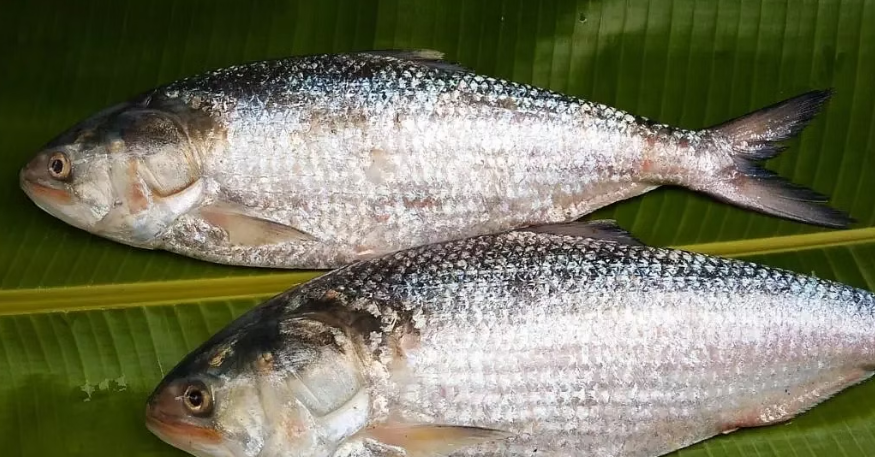

In [12]:
display(Image(FILE_NAME, width = 700, height = 400))

In [44]:
image_array = img.open('/content/5fec558b0aa410383d8f21d3_Tissue_Box_2x50.jpg').convert("RGB")

In [46]:
# feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
# model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')



# from transformers import AutoFeatureExtractor, AutoModelForImageClassification

# feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-large-patch16-384")
# model = AutoModelForImageClassification.from_pretrained("google/vit-large-patch16-384")
from transformers import AutoModelForImageClassification
model = AutoModelForImageClassification.from_pretrained("google/vit-hybrid-base-bit-384")

KeyError: ignored

In [45]:
inputs = feature_extractor(images = image_array,
                           return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits


predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: paper towel


In [48]:
from transformers import ViTHybridImageProcessor, ViTHybridForImageClassification
from PIL import Image
import requests

url = 'https://www.enostech.com/wp-content/uploads/2022/01/2.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = ViTHybridImageProcessor.from_pretrained('google/vit-hybrid-base-bit-384')
model = ViTHybridForImageClassification.from_pretrained('google/vit-hybrid-base-bit-384')

# inputs = feature_extractor(images=image, return_tensors="pt")
# outputs = model(**inputs)
# logits = outputs.logits
# # model predicts one of the 1000 ImageNet classes
# predicted_class_idx = logits.argmax(-1).item()
# print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: cab, hack, taxi, taxicab


In [49]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: cab, hack, taxi, taxicab
